# Data Collection

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
PATH = os.path.join("datasets", "titanic")
URL = DOWNLOAD_ROOT + "datasets/titanic/train.csv"

def fetch_titanic_data(url=URL, path=PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    csv_path = os.path.join(path, "titanic.csv")
    urllib.request.urlretrieve(url, csv_path)


def load_titanic_data(path=PATH):
    csv_path = os.path.join(path, "titanic.csv")
    return pd.read_csv(csv_path)

In [2]:
fetch_titanic_data()
titanic = load_titanic_data()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Preparation

### Separate survival label from the data

In [4]:
survival_labels = titanic["Survived"].copy()
titanic = titanic.drop("Survived", axis=1)
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Drop the following columns: PassengerId, Name, Ticket, and Cabin

In [5]:
titanic = titanic.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


### Fill the missing age with its median

In [6]:
median = titanic["Age"].median()
titanic["Age"].fillna(median, inplace=True)
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


### One-hot encode the following columns: pclass, sex, and embarked

In [8]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

In [9]:
pclass_1hot = cat_encoder.fit_transform(titanic[["Pclass"]])
ohe_df = pd.DataFrame(pclass_1hot, columns=cat_encoder.get_feature_names())
titanic = pd.concat([titanic, ohe_df], axis=1).drop(["Pclass"], axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   x0_1      891 non-null    float64
 7   x0_2      891 non-null    float64
 8   x0_3      891 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 62.8+ KB


In [10]:
sex_1hot = cat_encoder.fit_transform(titanic[["Sex"]])
ohe_df = pd.DataFrame(sex_1hot, columns=cat_encoder.get_feature_names())
titanic = pd.concat([titanic, ohe_df], axis=1).drop(["Sex"], axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        891 non-null    float64
 1   SibSp      891 non-null    int64  
 2   Parch      891 non-null    int64  
 3   Fare       891 non-null    float64
 4   Embarked   889 non-null    object 
 5   x0_1       891 non-null    float64
 6   x0_2       891 non-null    float64
 7   x0_3       891 non-null    float64
 8   x0_female  891 non-null    float64
 9   x0_male    891 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 69.7+ KB


In [11]:
modus = titanic["Embarked"].mode()
titanic["Embarked"].fillna(modus[0], inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        891 non-null    float64
 1   SibSp      891 non-null    int64  
 2   Parch      891 non-null    int64  
 3   Fare       891 non-null    float64
 4   Embarked   891 non-null    object 
 5   x0_1       891 non-null    float64
 6   x0_2       891 non-null    float64
 7   x0_3       891 non-null    float64
 8   x0_female  891 non-null    float64
 9   x0_male    891 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 69.7+ KB


In [12]:
embarked_1hot = cat_encoder.fit_transform(titanic[["Embarked"]])
ohe_df = pd.DataFrame(embarked_1hot, columns=cat_encoder.get_feature_names())
titanic = pd.concat([titanic, ohe_df], axis=1).drop(["Embarked"], axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        891 non-null    float64
 1   SibSp      891 non-null    int64  
 2   Parch      891 non-null    int64  
 3   Fare       891 non-null    float64
 4   x0_1       891 non-null    float64
 5   x0_2       891 non-null    float64
 6   x0_3       891 non-null    float64
 7   x0_female  891 non-null    float64
 8   x0_male    891 non-null    float64
 9   x0_C       891 non-null    float64
 10  x0_Q       891 non-null    float64
 11  x0_S       891 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 83.7 KB


### Scale the features with standard scaler

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic = pd.DataFrame(scaler.fit_transform(titanic))
titanic

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.565736,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,0.663861,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,-0.258337,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,0.433312,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.433312,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,-0.386671,-0.565685,1.960202,-1.107926,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-0.796285,-0.474545,-0.473674,-0.044381,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,-0.104637,0.432793,2.008933,-0.176263,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-0.258337,-0.474545,-0.473674,-0.044381,1.767767,-0.510152,-1.107926,-0.737695,0.737695,2.074505,-0.307562,-1.623803


### Prepare Data

In [14]:
X = titanic.to_numpy()
y = survival_labels.to_numpy()
y_cat = y.copy()
y_cat

print(X.shape, y.shape, y_cat.shape)
print(y_cat[y_cat == 1].shape, y_cat[y_cat == 0].shape)

(891, 12) (891,) (891,)
(342,) (549,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_cat_train, y_cat_test  = train_test_split(X, y, y_cat, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, y_cat_train.shape)
print(X_test.shape, y_test.shape, y_cat_test.shape)

(712, 12) (712,) (712,)
(179, 12) (179,) (179,)


# Classification Algorithms

### Logistic Regression

#### Holdout

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_cat_train)

LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score, f1_score

y_preds = log_reg.predict(X_test)
print(log_reg.predict_proba(X_test))
log_acc = accuracy_score(y_cat_test, y_preds)
print(log_acc * 100)

[[0.89538694 0.10461306]
 [0.74139637 0.25860363]
 [0.88063466 0.11936534]
 [0.08958273 0.91041727]
 [0.25313296 0.74686704]
 [0.07265144 0.92734856]
 [0.31196595 0.68803405]
 [0.91912992 0.08087008]
 [0.24163271 0.75836729]
 [0.09017309 0.90982691]
 [0.70051509 0.29948491]
 [0.93724176 0.06275824]
 [0.6194986  0.3805014 ]
 [0.85898598 0.14101402]
 [0.7670991  0.2329009 ]
 [0.07064614 0.92935386]
 [0.73077386 0.26922614]
 [0.31190993 0.68809007]
 [0.71654739 0.28345261]
 [0.70180658 0.29819342]
 [0.89246316 0.10753684]
 [0.63589063 0.36410937]
 [0.39270957 0.60729043]
 [0.88018363 0.11981637]
 [0.90132118 0.09867882]
 [0.94162636 0.05837364]
 [0.56026693 0.43973307]
 [0.7398138  0.2601862 ]
 [0.93114048 0.06885952]
 [0.40743067 0.59256933]
 [0.87751976 0.12248024]
 [0.34550491 0.65449509]
 [0.4699457  0.5300543 ]
 [0.38655988 0.61344012]
 [0.87426876 0.12573124]
 [0.87935493 0.12064507]
 [0.58702449 0.41297551]
 [0.31196595 0.68803405]
 [0.05956622 0.94043378]
 [0.90323988 0.09676012]


0.7794117647058824 0.7162162162162162 0.7464788732394366


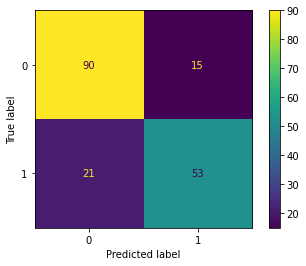

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

log_conf = confusion_matrix(y_cat_test, y_preds)
disp = ConfusionMatrixDisplay(log_conf)
disp.plot()

log_prec = precision_score(y_cat_test, y_preds)
log_rec = recall_score(y_cat_test, y_preds)
log_f1score = f1_score(y_cat_test, y_preds)
print(log_prec, log_rec, log_f1score)

#### Cross Validation

In [19]:
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression()
scores = cross_validate(log_reg, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print('Time:', scores['fit_time'])
print('Mean:', scores['fit_time'].mean())
print('Std:', scores['fit_time'].std())


print('Accuracy:', scores['test_accuracy'])
print('Mean:', scores['test_accuracy'].mean())
print('Std:', scores['test_accuracy'].std())


print('F1:', scores['test_f1'])
print('Mean:', scores['test_f1'].mean())
print('Std:', scores['test_f1'].std())

Time: [0.02194333 0.00398421 0.00398946 0.00498509 0.00698161]
Mean: 0.008376741409301757
Std: 0.0068708743033826765
Accuracy: [0.77653631 0.78651685 0.78651685 0.76966292 0.83146067]
Mean: 0.7901387232439896
Std: 0.021624169504146768
F1: [0.71014493 0.71641791 0.72058824 0.672      0.765625  ]
Mean: 0.7169552146556221
Std: 0.029831482952146215


### KNN

#### Holdout

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_cat_train)

KNeighborsClassifier()

In [21]:
from sklearn.metrics import accuracy_score, f1_score

y_preds = knn.predict(X_test)
log_acc = accuracy_score(y_cat_test, y_preds)
print(log_acc * 100)

81.00558659217877


0.7941176470588235 0.7297297297297297 0.7605633802816901


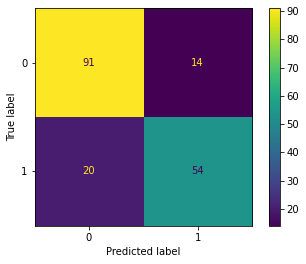

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

log_conf = confusion_matrix(y_cat_test, y_preds)
disp = ConfusionMatrixDisplay(log_conf)
disp.plot()

log_prec = precision_score(y_cat_test, y_preds)
log_rec = recall_score(y_cat_test, y_preds)
log_f1score = f1_score(y_cat_test, y_preds)
print(log_prec, log_rec, log_f1score)

#### Cross Validation

In [23]:
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_validate(knn, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print('Time:', scores['fit_time'])
print('Mean:', scores['fit_time'].mean())
print('Std:', scores['fit_time'].std())


print('Accuracy:', scores['test_accuracy'])
print('Mean:', scores['test_accuracy'].mean())
print('Std:', scores['test_accuracy'].std())


print('F1:', scores['test_f1'])
print('Mean:', scores['test_f1'].mean())
print('Std:', scores['test_f1'].std())

Time: [0.00399137 0.00199533 0.00201035 0.00199556 0.00199366]
Mean: 0.0023972511291503905
Std: 0.000797080020922204
Accuracy: [0.7877095  0.7752809  0.8258427  0.81460674 0.81460674]
Mean: 0.8036093151716779
Std: 0.018928884843330756
F1: [0.70769231 0.70149254 0.75968992 0.72727273 0.75555556]
Mean: 0.7303406100629287
Std: 0.023881978234782393


### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_validate

tree_class = DecisionTreeClassifier()

scores = cross_validate(tree_class, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print('Time:', scores['fit_time'])
print('Mean:', scores['fit_time'].mean())
print('Std:', scores['fit_time'].std())


print('Accuracy:', scores['test_accuracy'])
print('Mean:', scores['test_accuracy'].mean())
print('Std:', scores['test_accuracy'].std())


print('F1:', scores['test_f1'])
print('Mean:', scores['test_f1'].mean())
print('Std:', scores['test_f1'].std())

Time: [0.00394869 0.00203371 0.00195479 0.00199819 0.00395107]
Mean: 0.002777290344238281
Std: 0.0009577424945838655
Accuracy: [0.77094972 0.80898876 0.82022472 0.74157303 0.79775281]
Mean: 0.7878978093026175
Std: 0.028355602727036206
F1: [0.70072993 0.75       0.76119403 0.63492063 0.74285714]
Mean: 0.7179403469271647
Std: 0.046277468159971163


In [25]:
from sklearn import tree
import graphviz

tree_class = DecisionTreeClassifier(max_depth = 3)
tree_class.fit(X_train, y_cat_train)
 
dot_data = tree.export_graphviz(tree_class, out_file=None,
                      feature_names=titanic.columns.values,  
                      class_names=['below median', 'above median'],  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("tree")

'tree.pdf'

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

forest_class = RandomForestClassifier()

scores = cross_validate(forest_class, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print('Time:', scores['fit_time'])
print('Mean:', scores['fit_time'].mean())
print('Std:', scores['fit_time'].std())


print('Accuracy:', scores['test_accuracy'])
print('Mean:', scores['test_accuracy'].mean())
print('Std:', scores['test_accuracy'].std())


print('F1:', scores['test_f1'])
print('Mean:', scores['test_f1'].mean())
print('Std:', scores['test_f1'].std())

Time: [0.19239402 0.17311907 0.2024219  0.18858624 0.23287582]
Mean: 0.19787940979003907
Std: 0.019874156043627272
Accuracy: [0.78212291 0.79775281 0.84269663 0.78651685 0.8258427 ]
Mean: 0.8069863787583955
Std: 0.02346587008589697
F1: [0.71532847 0.72727273 0.79104478 0.69354839 0.78321678]
Mean: 0.7420822281717945
Std: 0.03841874931665891


### XGBoost

In [27]:
import xgboost as xgb
from sklearn.model_selection import cross_validate

xgb_class = xgb.XGBClassifier()

scores = cross_validate(xgb_class, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print('Time:', scores['fit_time'])
print('Mean:', scores['fit_time'].mean())
print('Std:', scores['fit_time'].std())


print('Accuracy:', scores['test_accuracy'])
print('Mean:', scores['test_accuracy'].mean())
print('Std:', scores['test_accuracy'].std())


print('F1:', scores['test_f1'])
print('Mean:', scores['test_f1'].mean())
print('Std:', scores['test_f1'].std())

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### SVM

In [28]:
from sklearn.svm import SVC

svc = SVC()
scores = cross_validate(svc, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print('Time:', scores['fit_time'])
print('Mean:', scores['fit_time'].mean())
print('Std:', scores['fit_time'].std())


print('Accuracy:', scores['test_accuracy'])
print('Mean:', scores['test_accuracy'].mean())
print('Std:', scores['test_accuracy'].std())


print('F1:', scores['test_f1'])
print('Mean:', scores['test_f1'].mean())
print('Std:', scores['test_f1'].std())

Time: [0.04090047 0.02194333 0.01495981 0.01894975 0.01894379]
Mean: 0.023139429092407227
Std: 0.00915366776537189
Accuracy: [0.82122905 0.82022472 0.82022472 0.79775281 0.84269663]
Mean: 0.8204255853367648
Std: 0.014218160451256333
F1: [0.72413793 0.73770492 0.75       0.67857143 0.76271186]
Mean: 0.7306252284090956
Std: 0.029005996255195038


### Neural Network

In [29]:
from sklearn.neural_network import MLPClassifier

mlpclass = MLPClassifier(hidden_layer_sizes=[32, 32])

scores = cross_validate(mlpclass, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print('Time:', scores['fit_time'])
print('Mean:', scores['fit_time'].mean())
print('Std:', scores['fit_time'].std())


print('Accuracy:', scores['test_accuracy'])
print('Mean:', scores['test_accuracy'].mean())
print('Std:', scores['test_accuracy'].std())


print('F1:', scores['test_f1'])
print('Mean:', scores['test_f1'].mean())
print('Std:', scores['test_f1'].std())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Time: [1.84872103 1.28173637 1.53952909 1.49923944 1.46043038]
Mean: 1.5259312629699706
Std: 0.18385434178608862
Accuracy: [0.78212291 0.82022472 0.84269663 0.78651685 0.85955056]
Mean: 0.8182223338145753
Std: 0.030395490861663942
F1: [0.69291339 0.74603175 0.7704918  0.6779661  0.80314961]
Mean: 0.7381105286262668
Std: 0.04690737269552952


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Comparison

The average time, accuracy and F1 score for each classification algorithm are stored in the mod6_akira_agusta.pdf.